In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("../Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop("CustomerID", axis=1, inplace=True)

In [5]:
le = LabelEncoder()

In [6]:
df["Genre"] = le.fit_transform(df["Genre"])

In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


C:\Users\palla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

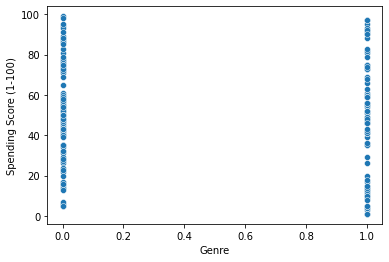

In [8]:
sns.scatterplot(df["Genre"],df["Spending Score (1-100)"])

C:\Users\palla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

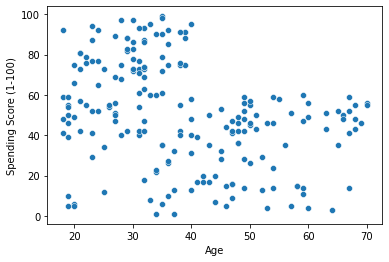

In [9]:
sns.scatterplot(df["Age"],df["Spending Score (1-100)"])

C:\Users\palla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

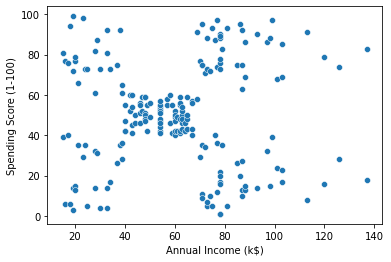

In [10]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [11]:
X = df.drop("Spending Score (1-100)", axis=1)
y = df[["Spending Score (1-100)"]]

In [12]:
labels = KMeans(n_clusters=5, random_state=42).fit_predict(X)

In [13]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

C:\Users\palla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

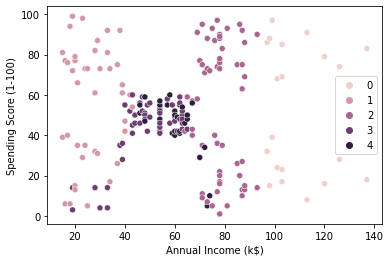

In [14]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"],hue=labels)

In [15]:
X = X.join(pd.DataFrame(labels, columns=["labels"]),how="left")

In [16]:
X

,Genre,Age,Annual Income (k$),labels
0,1,19,15,1
1,1,21,15,1
2,0,20,16,1
3,0,23,16,1
4,0,31,17,1
...,...,...,...,...
195,0,35,120,0
196,0,45,126,0
197,1,32,126,0
198,1,32,137,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.0037476984532311963

In [27]:
def regressor_fit(X, y):
    split_size = 0.3
    if(len(X) < 1000):
        split_size = 0.1
    elif(len(X) < 10000):
        split_size = 0.2
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1)
    
    lr = LinearRegression()
    
    dt = DecisionTreeRegressor()
    
    ls = Lasso()
    
    rd = Ridge()
    
    knn = KNeighborsRegressor()
      
   ## models = [lr, dt, ls, rd, knn]
    
    data = []
    models = {"Linear Regression" : lr, "Decision Tree" : dt, "Lasso" : ls, "Ridge" : rd, "KNN" : knn}
    
    i = 1
    for model_key in models:
        models[model_key].fit(X_train, y_train)
        y_pred = models[model_key].predict(X_test)
        score = r2_score(y_test, y_pred)
        error = np.sqrt(mean_squared_error(y_test, y_pred))
        cv_score = np.mean(cross_val_score(models[model_key], X, y, cv=10))
        data.append([i, model_key, score, error, cv_score])
        i+= 1
    data_frame = pd.DataFrame(data, columns=["Serial No","Model Name", "r2_score", "rmse", "cv_score"])
        
    return data_frame

In [30]:
regressor_fit(X,y)

,Serial No,Model Name,r2_score,rmse,cv_score
0,1,Linear Regression,0.088622,22.995796,-1.771720
1,2,Decision Tree,-0.396176,28.462256,-0.663647
2,3,Lasso,0.099565,22.857328,-1.689138
3,4,Ridge,0.088844,22.992994,-1.769963
4,5,KNN,0.341958,19.540061,-0.078089
